In [34]:
import torch
import math
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [22]:
labels = torch.load('../logs/Qwen/Qwen2.5-7B/16bit/zeroshot/rank0/winogrande_s/base/seed0/test_labels.pt')

zs_logits = torch.load('../logs/Qwen/Qwen2.5-7B/16bit/zeroshot/rank0/winogrande_s/base/seed0/test_logits.pt')[0].to(torch.float64)
zs_logits = torch.load('../logs/Qwen/Qwen2.5-7B/16bit/zeroshot/rank0/winogrande_s/base/seed0/test_logits.pt')[0].to(torch.float64)


mle_logits = torch.load('../logs/Qwen/Qwen2.5-7B/16bit/mle/rank8/winogrande_s/base/seed0/test_logits.pt')[0].to(torch.float64)
mle_logprobs = F.log_softmax(mle_logits, dim=-1)


scalabl_logits = torch.load('../logs/Qwen/Qwen2.5-7B/16bit/scalabl/rank8/winogrande_s/base/seed0/test_logits.pt')[0].to(torch.float64)

In [27]:
def load_pt(pt_fname):
    sample_logits = torch.load(pt_fname)[0].to(torch.float64)
    B, n_samples, C = sample_logits.shape
    sample_logprobs = F.log_softmax(sample_logits, dim=-1)
    logprobs = torch.logsumexp(sample_logprobs, dim=1) - math.log(n_samples)
    return logprobs

In [48]:
#mle_logprobs = load_pt('../logs/Qwen/Qwen2.5-7B/16bit/mle/rank8/winogrande_s/base/seed0/test_logits.pt')


tensor([0, 0, 1,  ..., 0, 0, 1])


In [79]:
probs = H / H.sum()
probs.()

tensor(0.0007, dtype=torch.float64)

Text(0.5, 1.0, 'Entropy Histogram - mle - Qwen2.5-7B - winogrande_s')

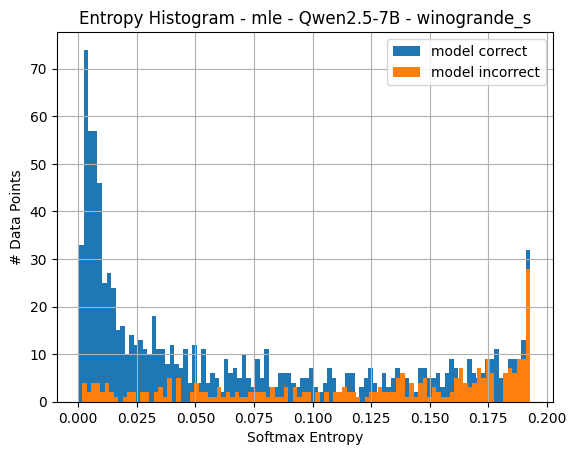

In [81]:
pt_fname = '../logs/Qwen/Qwen2.5-7B/16bit/scalabl/rank8/winogrande_s/base/seed0/test_logits.pt'
#pt_fname = '../logs/Qwen/Qwen2.5-7B/16bit/mle/rank8/winogrande_s/base/seed0/test_logits.pt'
#pt_fname = '../logs/Qwen/Qwen2.5-7B/16bit/zeroshot/rank0/winogrande_s/base/seed0/test_logits.pt'
logprobs = load_pt(pt_fname)
preds = torch.argmax(logprobs, dim=-1)
H = -torch.sum(logprobs.exp() * logprobs, dim=-1)
H /= H.sum()
H *= 100
is_correct = preds == labels
plt.hist(H[is_correct], density=False, bins=100, label='model correct')
plt.hist(H[~is_correct], density=False, bins=100, label='model incorrect')
plt.legend()
plt.grid()
plt.xlabel('Softmax Entropy')
plt.ylabel('# Data Points')
plt.title('Entropy Histogram - mle - Qwen2.5-7B - winogrande_s')

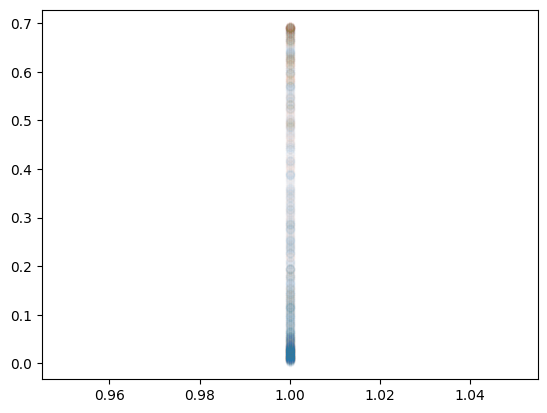

In [72]:
plt.scatter(torch.ones(len(H[is_correct])), H[is_correct], alpha=0.01)
plt.scatter(torch.ones(len(H[~is_correct])), H[~is_correct], alpha=0.01)

In [13]:
def average_log_probs(sample_logits):
    B, n_samples, C = sample_logits.shape
    sample_log_probs = torch.log_softmax(sample_logits, dim=-1)
    avg_log_probs = torch.logsumexp(sample_log_probs, dim=1) - math.log(n_samples)
    return avg_log_probs

In [16]:
average_log_probs(zs_logits).exp()

tensor([[0.1733, 0.8267],
        [0.1919, 0.8081],
        [0.2337, 0.7663],
        ...,
        [0.3486, 0.6514],
        [0.7432, 0.2568],
        [0.0716, 0.9284]], dtype=torch.float64)

In [17]:
average_log_probs(scalabl_logits).exp()

tensor([[0.6646, 0.3354],
        [0.7432, 0.2568],
        [0.3187, 0.6813],
        ...,
        [0.9342, 0.0658],
        [0.9874, 0.0126],
        [0.4033, 0.5967]], dtype=torch.float64)

In [18]:
average_log_probs(mle_logits).exp()

tensor([[4.2228e-06, 1.0000e+00],
        [3.3214e-05, 9.9997e-01],
        [5.8291e-05, 9.9994e-01],
        ...,
        [1.0000e+00, 1.4145e-06],
        [1.0000e+00, 7.5711e-07],
        [1.0000e+00, 1.3710e-06]], dtype=torch.float64)